## Project Goals

- **Objective:** To fine-tune my sneaker reselling strategy by zeroing in on the most profitable inventory. I aim to dissect StockX sales data to pinpoint the brands, models (silhouettes), variations (colorways), sizes, and other factors that drive the highest sales and profits.

- **Secondary Goal:** Beyond deriving actionable business insights, this project serves as a platform to exhibit my proficiency in SQL and data analysis, thereby making a compelling case for my skill set to potential employers.

In [227]:
# install libraries 
%conda install pandas numpy matplotlib seaborn

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [228]:
# import necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
# Load the csv data into a dataFrame 
df = pd.read_csv('./data/StockX-Data-Contest-2019-3 2.csv')

In [230]:
# Running df.info() will will provide us the structural details of the DataFrame, 
# such as the number of entries, column names, and data types. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


### Note
- As you can see from the output above, we need to clean some of this data. 
- Most of the values are of type 'object' 
- Columns like "Order Date," "Sale Price," "Release Date," and "Shoe Size" appear to be numerical data types, but they are currently stored as objects.

In [231]:
# Running df.head() well help us get a visual snapshot of what our data actually looks like 
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


## Data Cleaning 
- To clean and prep this data for analysis we will be converting the following columns: 
    - Order Date and Release Date --> DateTime objects 
    - Sale Price and Retail Price --> Strings to Numerica data values
- Lastly, we will check to see if there are any missing values or NaN values

In [232]:
# Convert 'Order Date' and 'Release Date' to DateTime objects

df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Release Date'] = pd.to_datetime(df['Release Date'])


/var/folders/vw/cxt6ymbx2d9bnhpxnxhthftw0000gn/T/ipykernel_60337/1170682018.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
/var/folders/vw/cxt6ymbx2d9bnhpxnxhthftw0000gn/T/ipykernel_60337/1170682018.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


### Convert Sale Price and Retail price to Numerical Values 
- These values are currently strings with dollar signs, which makes numerical analysis impossible.

In [233]:
# Remove dollar signs and convert to float

df['Sale Price'] = df['Sale Price'].str.replace('$', '').str.replace(',', '').astype(float)
df['Retail Price'] = df['Retail Price'].str.replace('$', '').str.replace(',', '').astype(float)


In [234]:
df.info() # Double check that conversion actually happened  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    99956 non-null  datetime64[ns]
 1   Brand         99956 non-null  object        
 2   Sneaker Name  99956 non-null  object        
 3   Sale Price    99956 non-null  float64       
 4   Retail Price  99956 non-null  float64       
 5   Release Date  99956 non-null  datetime64[ns]
 6   Shoe Size     99956 non-null  float64       
 7   Buyer Region  99956 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 6.1+ MB


## Exploratory Data Analysis (EDA)
- First we will start off with getting an idea of the price distribution of the sales price of the entire data set by plotting histograms. 



(0.0, 1200.0)

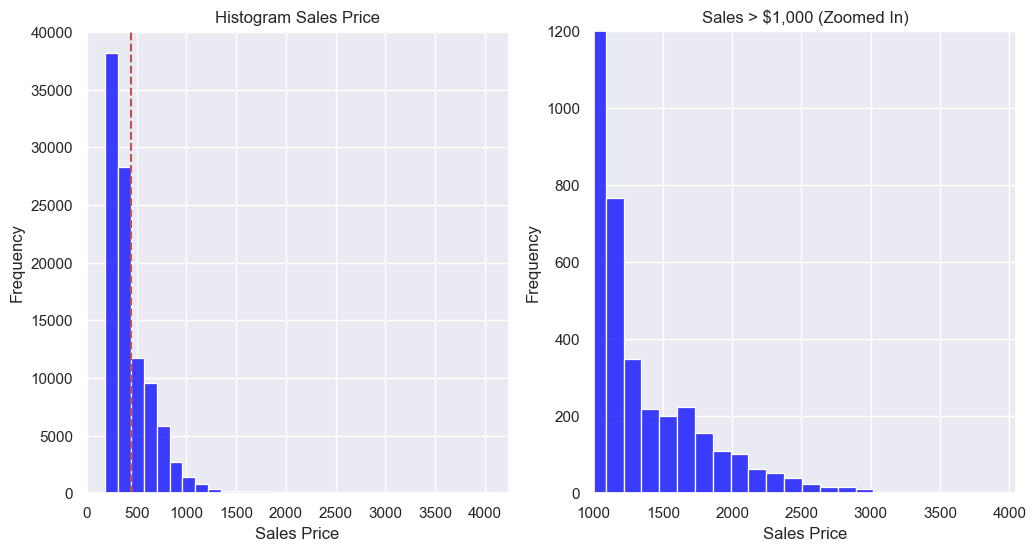

In [253]:
# Create a 1x2 grid of subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first histogram on the first subplot (using sns)
sns.histplot(df['Sale Price'], bins = 30, color = 'blue', kde = False, ax = axes[0])
axes[0].set_title('Histogram Sales Price')
axes[0].set_xlabel('Sales Price')
axes[0].set_ylabel('Frequency')

# Plot vertical mean 
sales_price_mean = df['Sale Price'].mean()
axes[0].axvline(sales_price_mean, color='r', linestyle='--', label='Mean') # axis vertical line 

# Plot the second histogram on the second subplot (using sns) 
sns.histplot(df['Sale Price'], bins = 30, color = 'blue', kde = False, ax = axes[1])
axes[1].set_title('Sales > $1,000 (Zoomed In)')
axes[1].set_xlabel('Sales Price')
axes[1].set_ylabel('Frequency')

# Zooming in on the data for 2nd plot 
sales_max = int(df['Sale Price'].max())
plt.xlim([1000, sales_max])  # Set x-axis limits
plt.ylim([0, 1200]) # Set y-axis limits 



## Sales Price Box Plot

Here is a box plot for the same data. I like using box plots because it gives us a clear 
understanding of the data's 5 number summary: 

- Min
- First Quartile (25th Percentile)
- Median 
- Third Quartile (75th Percentile)
- Max 

Box Plots also help provide a graphical summary of the dataset's central tendency, spread, and shape


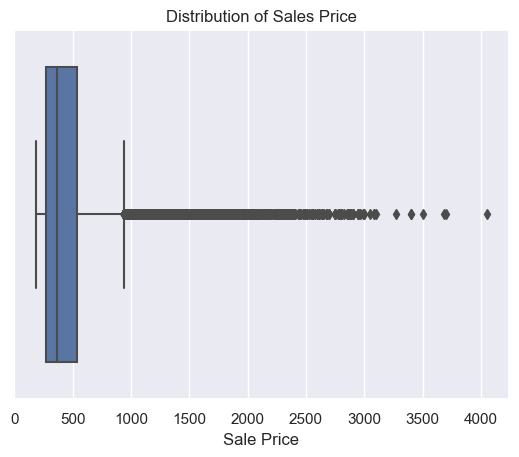

count    99956.000000
mean       446.634719
std        255.982969
min        186.000000
25%        275.000000
50%        370.000000
75%        540.000000
max       4050.000000
Name: Sale Price, dtype: float64

In [237]:
sns.boxplot(x=df['Sale Price'])
plt.title('Distribution of Sales Price')
plt.show()

# Here is the statistical summary of the "Sales Price" as well. 
df['Sale Price'].describe()

## Sales Price Summary: 
Based on the Sales Price dataset we can see taht the biggest sale was $4,050 and the lowest sale was $186. The average sale price was about $446. 